# Projet numérique : choix du pas de temps

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Préliminaires

On dit qu'un modèle est convergent d'ordre $p$ si on peut trouver $c_v$ tel que, si on note $J$ l'ensemble des points de calcul, on ait $\underset{1 \leq j \leq J}{max} \phantom{x} ||x^j - x(t_j)|| \leq c_v (\Delta t)^p$ avec $\Delta t = \underset{1 \leq j \leq J-1}{max} \Delta t_j$.

## Pas fixe
#### Convergence d'un schéma d'ordre 1

On définit ici la fonction mettant en place la méthode Euler explicite pour résoudre une équation différentielle décrite par le système suivant : si on note $x$ la fonction qui fait l'objet du système différentiel, on va résoudre l'équation $\overset{.}{x}
= f(x,t)$. On aura $\Delta t = dt$ puisque tous les pas de temps sont constants.

In [13]:
def solve_euler_explicit(f, x0, dt, tf, t0 = 0):
    """
    Systemes de la forme : Up = f(U, t)
    Description de f : f = (lambda U, t : ...)
                        --> si Up et/ou U et/ou t n'apparait pas dans le systeme diff, ne pas le.s mentionner dans les ...
    Entree : f citee precedemment, f(t0), le pas dt, le temps final tf, le temps initial t0
    Sortie : le tableau des temps t et de la fonction x
    """
    t = np.arange(t0, tf + dt, dt)
    x = [x0]
    for tk in t[:-1]:
        x += [x[-1] + dt * f(x[-1], tk)]        #Utilisation du schéma explicite d'Euler
    x = np.array(x)
    return(t, x)

On choisi l'exemple de la fonction exponentielle que l'on connaît bien : en notant $u = exp$, on a $\overset{.}{u}
= u$. On a donc : $f = u$

On codera donc en entrée de la fonction $solve\_euler\_explicit$ la fonction $f$ par $f = lambda \phantom{x} u : u$. On choisi l'intervalle de temps $[t_0, t_f] = [0, 3$

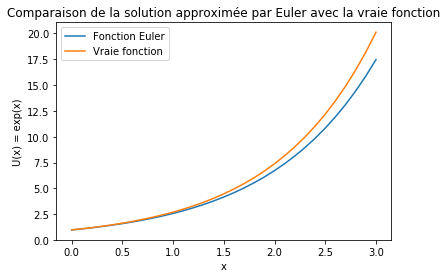

In [14]:
dt = 0.1
#Calculs de la solution approchee par Euler et de la vraie fonction
t, x = solve_euler_explicit(lambda u, t : u, 1, dt, 3, 0)
vraie_fonction = np.exp(t)

#Fonctions d'affichage
plt.plot(t, x, label = 'Fonction Euler')
plt.plot(t, vraie_fonction, label = 'Vraie fonction')
plt.xlabel('x')
plt.ylabel('U(x) = exp(x)')
plt.title('Comparaison de la solution approximée par Euler avec la vraie fonction')
plt.legend()
plt.show()

On cherche désormais à prouver la convergence du schéma Euler explicite à l'ordre 1. On choisi donc plusieurs $\Delta t = dt$ rassemblés dans un vecteur noté $dt$. On visualise alors la convergence à l'ordre 1 par le fait que le maximum des erreurs pour $dt_i$ est bien inférieur à $c_v . dt_i$

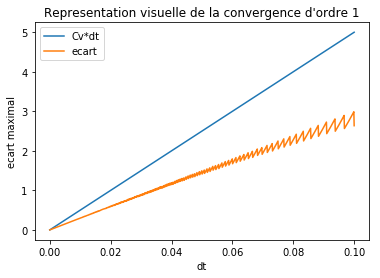

In [15]:
#Generation de plusieurs dt tous regroupes dans un meme vecteur
dt = np.linspace(0.00001, 0.1, 1000)
ecart = []

#Calcul pour chaque dt de l'ecart maximal entre la solution approchee et la vraie fonction
for dti in dt:
    t, x = solve_euler_explicit(lambda u, t : u, 1, dti, 3, 0)
    vraie_fonction = np.exp(t)
    ecart += [max(abs(x - vraie_fonction))]
    
c_v = 50

conv_ordre_1 = c_v * dt
ecart = np.array(ecart)

#Fonctions d'affichage
plt.plot(dt, conv_ordre_1, label = 'Cv*dt')
plt.plot(dt, ecart, label = 'ecart')
plt.xlabel('dt')
plt.ylabel('ecart maximal')
plt.title("Representation visuelle de la convergence d'ordre 1")
plt.legend()
plt.show()

On voit ici que le schéma semble bien converger à l'ordre 1 puisque pour tous les dt choisi, on a bien que la courbe $ecart$ passe sous la courbe $Cv*dt$ avec **$c_v = 50$, indépendant de tous les dt**.

*Remarque : le décalage en dents de scie est dû au fait que lors de la création du tableau des temps $t$ dans le solveur, le linspace fait que le dernier intervalle de temps avant la borne de droite n'est pas égal à dt mais est forcément plus petit que dt. Comme l'erreur maximale, dans le cas de l'exponentielle, est commise sur le dernier point (cf figure Comparaison de la solution avec approximée par Euler avec la vraie fonction), l'erreur varie brusquement lorsque on arrive à loger "correctement" le dernier pas de temps et que d'un coup on ne peut plus le loger car on l'a un peu augmenté.*

#### Convergence d'un schéma d'ordre 2

Cette fois, pour le schéma de convergence d'ordre 2, on choisit le schéma de Runge dont la démonstration de la convergence et de son ordre est donnée en page 2 de http://math.univ-lyon1.fr/~benzoni/M2AO/Schemas-EDO.pdf (ordre 2 car approximation de l'intégrale par la méthode des trapèzes). La seule différence par rapport au schéma d'Euler provient du fait que dans le solver, on remplace $f(x, t)$ par $f(x + \frac{1}{2} \phantom{x} dt \phantom{x} f(x, t), t + \frac{1}{2} \phantom{x} dt)$. On aurait aussi pu utiliser le schéma de Heun qui est présenté dans le cours.

In [16]:
def solve_runge_explicit(f, x0, dt, tf, t0 = 0):
    """
    Systemes de la forme : Up = f(U, t)
    Description de f : f = (lambda U, t : ...)
                        --> si Up et/ou U et/ou t n'apparait pas dans le systeme diff, ne pas le.s mentionner dans les ...
    Entree : f citee precedemment, f(t0), le pas dt, le temps final tf, le temps initial t0
    Sortie : le tableau des temps t et de la fonction x
    """
    t = np.arange(t0, tf + dt, dt)
    x = [x0]
    for tk in t[:-1]:
        x += [x[-1] + dt * f(x[-1] + 0.5*dt*f(x[-1],tk), tk + 0.5*dt)]        #Utilisation du schema de Runge
    x = np.array(x)
    return(t, x)

On utilise le même exemple que précédemment.

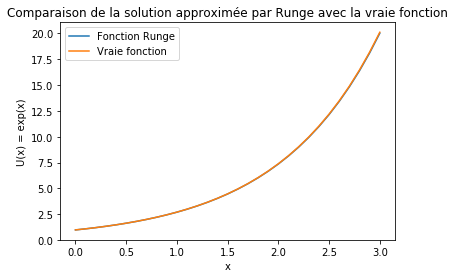

In [17]:
dt = 0.1
#Calculs de la solution approchee par Runge et de la vraie fonction
t, x = solve_runge_explicit(lambda u, t : u, 1, dt, 3, 0)
vraie_fonction = np.exp(t)

#Fonctions d'affichage
plt.plot(t, x, label = 'Fonction Runge')
plt.plot(t, vraie_fonction, label = 'Vraie fonction')
plt.xlabel('x')
plt.ylabel('U(x) = exp(x)')
plt.title('Comparaison de la solution approximée par Runge avec la vraie fonction')
plt.legend()
plt.show()

Cette fois, on constate que l'erreur est bien plus faible, dû à une convergence plus rapide.

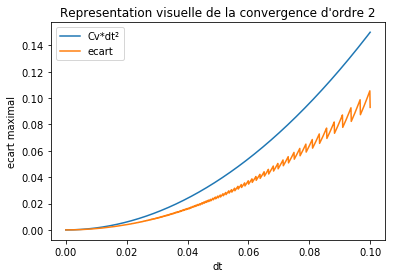

In [18]:
#Generation de plusieurs dt tous regroupes dans un meme vecteur
dt = np.linspace(0.00001, 0.1, 1000)

#Calcul pour chaque dt de l'ecart maximal entre la solution approchee et la vraie fonction
ecart = []
for dti in dt:
    t, x = solve_runge_explicit(lambda u, t : u, 1, dti, 3, 0)
    vraie_fonction = np.exp(t)
    ecart += [max(abs(x - vraie_fonction))]

c_v = 15

conv_ordre_1 = c_v * dt * dt
ecart = np.array(ecart)

#Fonctions d'affichage
plt.plot(dt, conv_ordre_1, label = 'Cv*dt²')
plt.plot(dt, ecart, label = 'ecart')
plt.xlabel('dt')
plt.ylabel('ecart maximal')
plt.title("Representation visuelle de la convergence d'ordre 2")
plt.legend()
plt.show()

On voit ici que le schéma semble bien converger à l'ordre 2 puisque pour tous les dt choisi, on a bien que la courbe $ecart$ passe sous la courbe $Cv*dt²$ avec **$c_v = 15$, indépendant de tous les dt**.

*Remarque : On aurait pu, pour l'ordre 2, trouver l'ordre de convergence en appliquant le $ln$ à la courbe $ecart$ pour ainsi avoir accès grâce au coefficient directeur à l'ordre de convergence.*

## Pas variable (adaptation du pas de temps)

**Question 1** On cherche à montrer que si $f$ est $C^1$, on a pour le schéma d'Euler explicite $||e^{j+1}|| = \Delta t \frac{||f(t_{j+1}, x^{j+1}) - f(t_j, x^j)||}{2} + O(\Delta t_j^3)$

*Démonstration*

On part de $$ e^{j+1} = \left(x^j + \int_{t_j}^{t_{j+1}} f(s,x(s))ds\right) - x^{j+1} $$

Que l'on peut réécrire sous la forme : $$ e^{j+1} = x^j + x(t_{j+1})-x(t_{j}) - x^{j+1} \ \ \ \ \ \ \ \ (1)$$

Or on a la relation (Schéma Euler explicite) :$$ x^{j+1} = x^j + \Delta t_{j} f(t_j,x^j) \  $$

Et par formule de Taylor-Young, sachant que $ x(t_{j}) = x^j$, on a : $$ x(t_{j+1}) = x(t_j) + \Delta t_{j}f(t_j,x^j) +  \frac{\Delta t_{j}^2}{2}(\ \partial_t f(t_j,x^j) + \partial_x f(t_j,x^j) \cdot f(t_j,x^j)\ ) + O(\Delta t_j^3)$$

Donc en simplifiant (1) on obtient $$e^{j+1}=\frac{\Delta t_{j}^2}{2}(\ \partial_t f(t_j,x^j) + \partial_x f(t_j,x^j) \cdot f(t_j,x^j)\ ) + O(\Delta t_j^3)\ \ \ \ \ \ \ \ (2)$$

En suite on remarque que $$f(t_{j+1},x^{j+1})=f(\ (t_j,x_j)\ +\Delta t_j(1,f(t_j,x^j))\ )$$

Donc en développant f au premier ordre :$$f(t_{j+1},x^{j+1})=f(t_j,x_j)+\Delta t_{j}(\ \partial_t f(t_j,x^j) + \partial_x f(t_j,x^j) \cdot f(t_j,x^j)\ ) + O(\Delta t_j^2)$$

On peut donc réécrire l'équation (2) :$$e^{j+1} = \Delta t_j \frac{f(t_{j+1}, x^{j+1}) - f(t_j, x^j)}{2} + O(\Delta t_j^3)$$

Soit encore $$\boxed{||e^{j+1}|| = \Delta t_j \frac{||f(t_{j+1}, x^{j+1}) - f(t_j, x^j)||}{2} + O(\Delta t_j^3)}$$ 

**Question 2** On cherche, en justifiant que par ailleurs $e^{j+1} = O(\Delta t_j^2)$, à en déduire qu'une possible stratégie d'adaptation est de prendre $\Delta t_{new} = \Delta t \sqrt{\frac{Tol_{abs}}{||e^{j+1}||}}$

*Démonstration*

Le développement limité de f : $f(t_{j+1},x^{j+1})=f(t_j,x_j)+\Delta t_{j}(\ \partial_t f(t_j,x^j) + \partial_x f(t_j,x^j) \cdot f(t_j,x^j)\ ) + O(\Delta t_j^2)$ montre que $f(t_{j+1}, x^{j+1}) - f(t_j, x^j) = O(\Delta t_j)$ et donc que $e^{j+1} = O(\Delta t_j^2)$.

On se place dans le "pire des cas" (c'est à dire le cas où $||e^{j+1}||$ est maximal à un terme négligeable près) où $e^{j+1}=C\Delta t_j^2$.

Dans ce cas on a $e^{j+1}_{new}=C\Delta t_{new}^2$

On se place dans le cas limite où  $||e^{j+1}_{new}||=Tsol_{abs}$

Dans ce cas $\Delta t_{new}=\sqrt{\frac {||e^{j+1}_{new}||}{||C||}}$

Qui peut se réécrire $$\boxed{\Delta t_{new}=\Delta t_j\sqrt{\frac{Tsol_{abs}}{||e^{j+1}||}}}$$



**Explication du solveur avec adaptation du pas de temps** Le code est redonné ci-dessous

In [1]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        
        while ti < dtmax:
            #Incrementation de toutes les variables / schema d'Euler explicite
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            
            #Raisonnement a l'envers : estimation du point precedent avec le nouveau point calcule (Euler a l'envers)
            #On cherche a evaluer l'erreur commise sur le point x_back par rapport a x
            x_back = x_next - dt * f(x_next)
            
            #Explication 1 ci dessous
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            
            #Calcul de Delta t new a l'aide la formule precedente en utilisant une marge
            #(ponderation de 0.9, et prise en compte du O(t^3) dans la formule de ||e^(j+1)||)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            
            #L'objectif est de garder un pas de temps compris entre dtmin et dtmax
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        
        #Explication 2 ci dessous
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

**Explication 1**
On cherche à montrer pourquoi $\frac{||x_{back} - x||}{2} = ||e^{j+1}||$  avec $||e^{j+1}||$ donnée précédemment. On représente sur le graphique suivant une possibilité de résolution de la fonction exponentielle avec la méthode d'Euler : on construit les points $x_j$, $x_{j+1}$ et $x_{j+2}$ avec $x_{j+1} = x_{new}$ (dans le code fourni ci-avant). $x_{back}$ a été construit en revenant à l'envers avec Euler appliqué en $x_{new}$ d'où le fait qu'il soit sur la droite $(x_{j+1}x_{j+2})$.

*Démonstration* Tout d'abord, en se servant des formules du schémas d'Euler explicite, $f(t_{j+1}, x^{j+1}) - f(t_j, x^j) = \frac{x_{j+2} - x_{j+1}}{\Delta t} - \frac{x_{j+1} - x_j}{\Delta t} = \frac{x_{j+2} - 2x_{j+1} + x_j}{\Delta t}$ soit $||e^{j+1}|| = \frac{||x_{j+2} - 2x_{j+1} + x_j||}{2} + O(\Delta t_j^3)$.

On remarque sur le schéma ci dessous que $||x_{j+2} - 2x_{j+1} + x_j|| = ||x_{back} - x_j||$ (en effet, $|6 - 8 + 3| = |2 - 3| = 1$).

Ceci explique la formule utilisée dans le code.

<img src="files/schema_euler.png">

**Explication 2** On veut échantilloner la fonction à $dt_{max}$ cad obtenir un tableau où les différents valeurs de la solution on été échantillonées à $dt_{max}$. Or, il est possible (voir certain) que l'erreur commence à croître grandement entre chaque point. C'est pour cette raison que l'on décide de résoudre avec plus de précision l'équation différentielle en calculant des valeurs intermédiaires de la solution situées sur chaque segment $[t_j, t_j + dt_{max} = t_{j+1}]$ grâce à la boucle *while* située juste au dessus (et donc grâce à une adaptation du pas de temps). Une fois que des points intermédiaires ont été calculé dans l'intervalle considéré, on peut donc affirmer que le nouveau point $x_{next}$ est peu entaché d'erreur, et on peut alors l'enregistrer.

***The End***